In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as imgg
import cv2

In [2]:
from glob import glob

In [8]:
# loading numpy zip
data=np.load('./output_crop/data_10000_norm.npz')

In [9]:
x=data['arr_0']
y=data['arr_1']
print(x.shape),print(y.shape)

(5458, 10000)
(5458,)


(None, None)

# Eigen Image

In [16]:
import sklearn
x1=x-x.mean(axis=0)
from sklearn.decomposition import PCA
pca=PCA(n_components=None,whiten=True,svd_solver='auto')
x_pca=pca.fit_transform(x1)

In [17]:
x_pca.shape

(5458, 5458)

In [19]:
eigen_ratio=pca.explained_variance_ratio_
eigen_ratio_cum=np.cumsum(eigen_ratio)

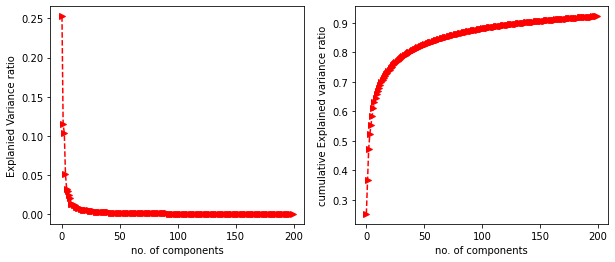

In [21]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(eigen_ratio[:200],'r>--')
plt.xlabel('no. of components')
plt.ylabel('Explanied Variance ratio')
plt.subplot(1,2,2)
plt.xlabel('no. of components')
plt.ylabel('cumulative Explained variance ratio')
plt.plot(eigen_ratio_cum[:200],'r>--')

In [ ]:
# From chart using elbow method we can see number of components 25,30 xaxis value.
# explained variance is 75% yaxis. 

In [22]:
pca_50=PCA(n_components=50,whiten=True,svd_solver='auto')
x_pca_50=pca_50.fit_transform(x1)

In [23]:
x_pca_50.shape

(5458, 50)

In [25]:
#saving the result
import pickle
pickle.dump(pca_50,open('./output_crop/pca_50.pickle','wb'))